<a href="https://colab.research.google.com/github/jeffleon/Python_Google_Colab/blob/master/Data_Wrangling_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploratory Data Analysis (EDA)** 


  *   ***Descriptive Statistics***
  *   ***GroupBy***
  *   ***ANOVA***
  *   ***Correlation***
  *   ***Correlation - Statistics***








##**Descriptive Statistics**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas.util.testing as tm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [42]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [43]:
drinks.describe()
drinks.info

<bound method DataFrame.info of          country  beer_servings  ...  total_litres_of_pure_alcohol      continent
0    Afghanistan              0  ...                           0.0           Asia
1        Albania             89  ...                           4.9         Europe
2        Algeria             25  ...                           0.7         Africa
3        Andorra            245  ...                          12.4         Europe
4         Angola            217  ...                           5.9         Africa
..           ...            ...  ...                           ...            ...
188    Venezuela            333  ...                           7.7  South America
189      Vietnam            111  ...                           2.0           Asia
190        Yemen              6  ...                           0.1           Asia
191       Zambia             32  ...                           2.5         Africa
192     Zimbabwe             64  ...                           4.7

In [44]:
drinks_counts = drinks["beer_servings"].value_counts()
drinks_counts.head()

0     15
5      5
6      4
31     4
25     4
Name: beer_servings, dtype: int64

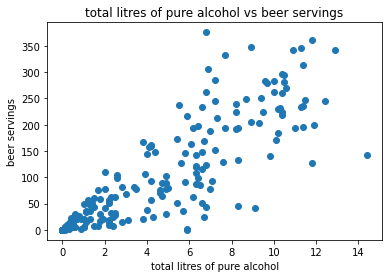

In [45]:
x = drinks["total_litres_of_pure_alcohol"]
y = drinks["beer_servings"]
plt.title("total litres of pure alcohol vs beer servings")
plt.xlabel("total litres of pure alcohol")
plt.ylabel("beer servings")
plt.scatter(x,y)
plt.show()

In [46]:
df = pd.DataFrame({"number":[2,34,5,67,np.nan],"blank":[np.nan,np.nan,np.nan,np.nan,np.nan]},index=["uno","dos","tres","cuatro","cinco"])
df

,number,blank
uno,2.0,NaN
dos,34.0,NaN
tres,5.0,NaN
cuatro,67.0,NaN
cinco,NaN,NaN


In [47]:
df.dropna(subset=["number"],axis= 0, inplace=True)
df

,number,blank
uno,2.0,NaN
dos,34.0,NaN
tres,5.0,NaN
cuatro,67.0,NaN


In [48]:
values = df["number"].value_counts()
values.describe

<bound method NDFrame.describe of 67.0    1
5.0     1
34.0    1
2.0     1
Name: number, dtype: int64>

##**Descriptive Statistics - Box Plot**

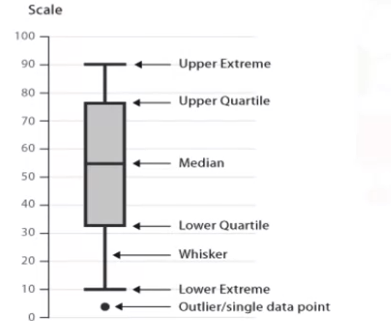

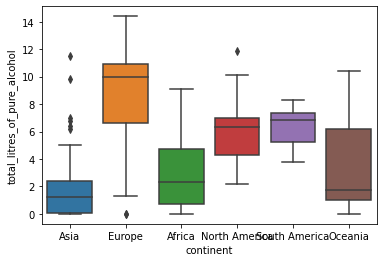

In [62]:
sns.boxplot(x="continent",y="total_litres_of_pure_alcohol",data=drinks)
plt.show()

##**GroupBy**

In [0]:
df = pd.read_csv('http://bit.ly/drinksbycountry')

In [50]:
grp = df.groupby('continent',as_index=False).mean()
grp

,continent,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Africa,61.471698,16.339623,16.264151,3.007547
1,Asia,37.045455,60.840909,9.068182,2.170455
2,Europe,193.777778,132.555556,142.222222,8.617778
3,North America,145.434783,165.739130,24.521739,5.995652
4,Oceania,89.687500,58.437500,35.625000,3.381250
5,South America,175.083333,114.750000,62.416667,6.308333


In [51]:
df_pivot = grp.pivot_table(index="continent")
df_pivot

,beer_servings,spirit_servings,total_litres_of_pure_alcohol,wine_servings
continent,,,,
Africa,61.471698,16.339623,3.007547,16.264151
Asia,37.045455,60.840909,2.170455,9.068182
Europe,193.777778,132.555556,8.617778,142.222222
North America,145.434783,165.739130,5.995652,24.521739
Oceania,89.687500,58.437500,3.381250,35.625000
South America,175.083333,114.750000,6.308333,62.416667


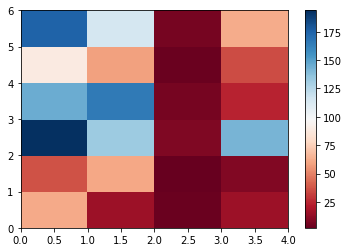

In [52]:
plt.pcolor(df_pivot,cmap="RdBu")
plt.colorbar()
plt.show()

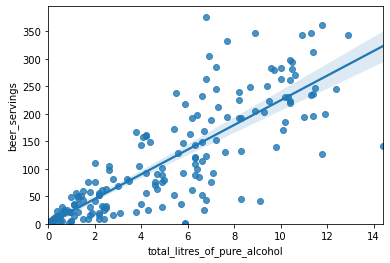

In [53]:
sns.regplot(x="total_litres_of_pure_alcohol",y="beer_servings",data=df)
plt.ylim(0,)
plt.show()

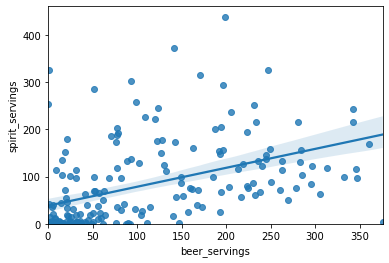

In [54]:
sns.regplot(x="beer_servings",y="spirit_servings",data=df)
plt.ylim(0,)
plt.show()

##**Pearson Correlation**


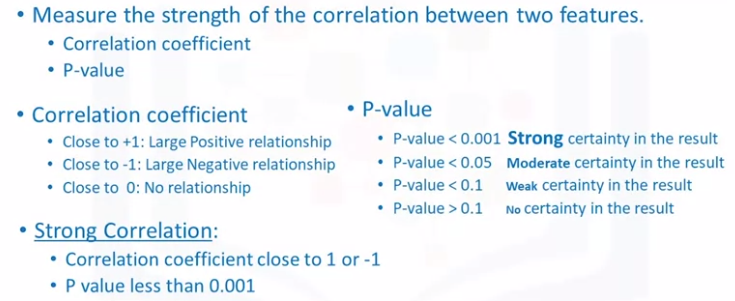

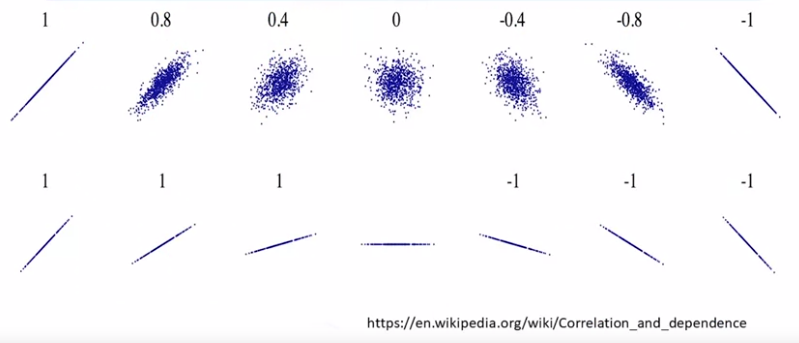

In [0]:
pearson_coef, p_value = stats.pearsonr(df["beer_servings"],df["total_litres_of_pure_alcohol"])

In [57]:
pearson_coef, p_value

(0.8358386279352703, 1.2369157909983856e-51)

In [0]:
pearson_coef, p_value = stats.pearsonr(df["wine_servings"],df["total_litres_of_pure_alcohol"])

In [59]:
pearson_coef, p_value

(0.6675983418034832, 2.898357698043607e-26)

##**ANOVA**

In [0]:
df = pd.read_csv('http://bit.ly/drinksbycountry')

In [25]:
grp = df.groupby('continent')
grp

In [0]:
Anove_Continent = stats.f_oneway(grp.get_group("Africa")["beer_servings"],grp.get_group("Asia")["beer_servings"])

In [37]:
Anove_Continent

F_onewayResult(statistic=3.0781865678718314, pvalue=0.08257335069438983)